# Prompts

## Overview

### Available Operations

* [list](#List) - List all prompts
* [create](#Create) - Create a new prompt
* [update](#Update) - Update a prompt
* [delete](#Delete) - Delete a prompt
* [retrieve](#Retrieve) - Retrieve a prompt
* [list_versions](#ListOfVersions) - List all prompt versions
* [get_version](#PromptVersion)  - Retrieve a prompt version


### Setup

Before trying out the code set up the virtual environment and the environment variable. 

On the terminal go to the project directory, activate the virtual environment and install Orq sdk:

In [ ]:
#  pip install orq-ai-sdk - latest version

Next set up the API key:

In [ ]:
import os

os.environ["ORQ_API_KEY"] = ""

In [ ]:
from orq_ai_sdk import Orq
import os

orq = Orq(server_url="https://my.orq.ai", api_key=os.getenv("ORQ_API_KEY"))

## List

List information about prompts from your workspace.

In [ ]:
# Without extra parameters
res = orq.prompts.list() 
print(res.data)

print("")
print("Your Prompts:")
for prompt in res.data:
    print(prompt.display_name)

In [ ]:
# With extra parameters
limit = 2
stariting_after = "" 
ending_before = ""

# Out of examplary prompts list: [Promp4, Prompt3, Promp2, Promp1]
resPage1 = orq.prompts.list(limit = limit)
print("First page:")
for prompt in resPage1.data:
    print(prompt.display_name) # prints [Promp4, Prompt3]
    

resPage2 = orq.prompts.list(limit = limit, ending_before=ending_before) 
print("Previous page:")
for prompt in resPage2.data:
    print(prompt.display_name) # When ending_before= 3,  prints [Promp2, Prompt1]


resPage3 = orq.prompts.list(limit = limit, starting_after=stariting_after) 
print("Next page:")
for prompt in resPage3.data:
    print(prompt.display_name) # When starting_after= 2, prints [Promp4, Prompt3]

## Create

Create a new prompt.

### Example Usage

In [ ]:
path = "Default/Prompts"

prompt = {
  "prompt_config": {
    "messages": [
      {
        "content": "You are a helpful assistant. Test", # this is the system that you want to have
        "role": "system" 
      },
      {
        "content": "you will help me answer all the quesitons in a concise and clear manner",
        "role": "assistant"
      }
    ]
  },
  "display_name": "Prompt_Test",
  "path": path
}

res = orq.prompts.create(request=prompt)
print(res)

print("")
print(f"Created prompt at: {path} with a name {res.display_name}")

This is how it will appear on your dashboard
![image.png](<attachment:image.png>)
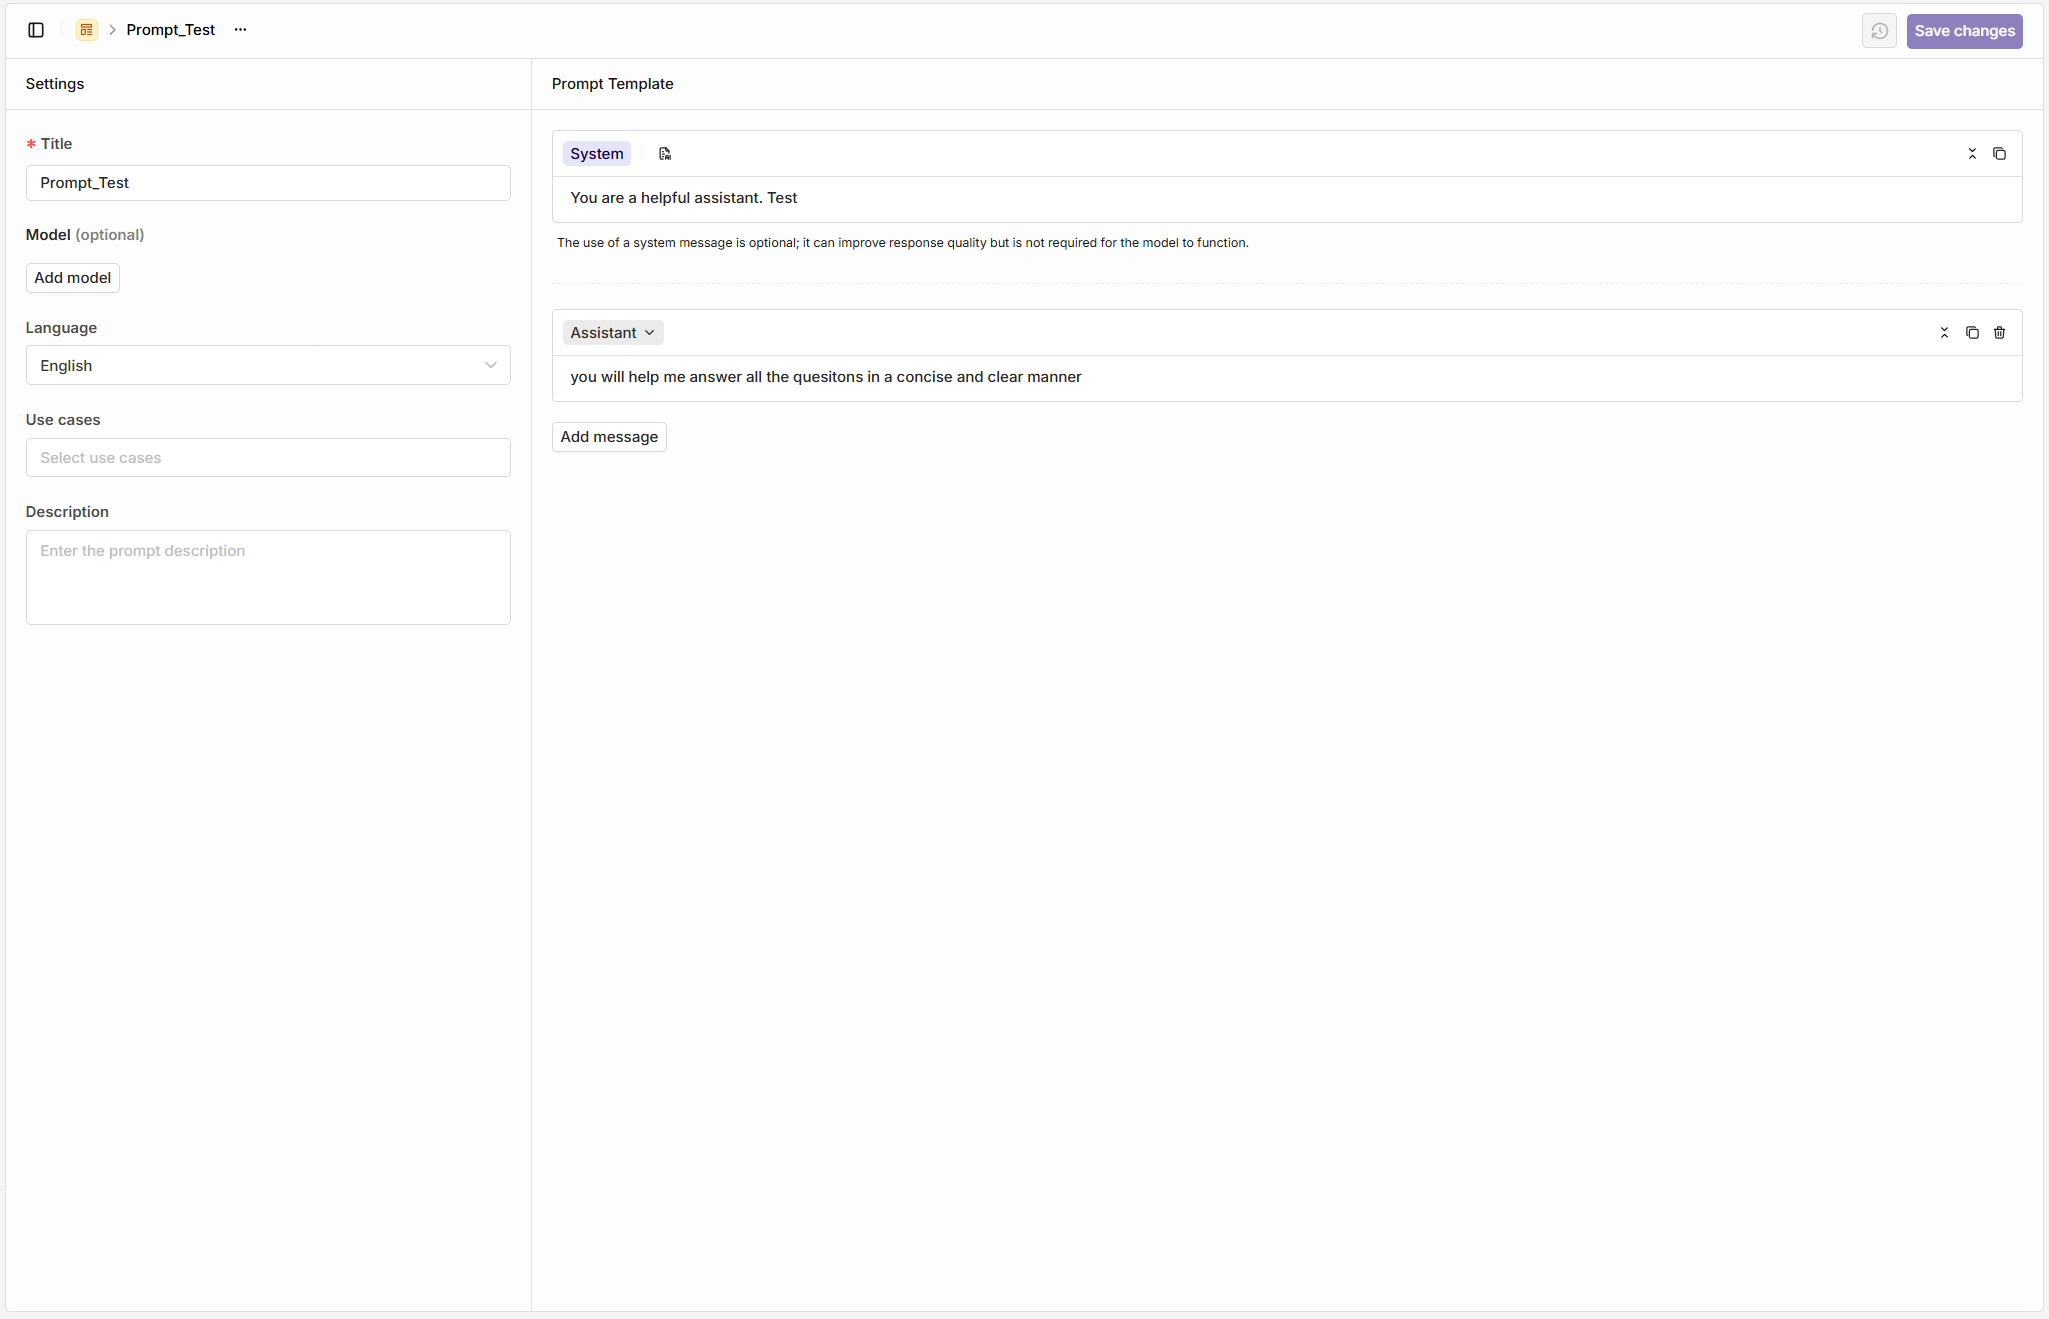

## Retrieve

Retrieve information of a specific prompt.

In [ ]:
specific_prompt_id = '' # change for the prompt id from your workspace

In [ ]:
# to get the information of the prompt ==> we use the retrieve method
res = orq.prompts.retrieve(id= specific_prompt_id)
print(res)

print("")
print(f"Retrieved prompt with id {res.id} and a name {res.display_name}")

## Update

Update settings of a specific prompt.

In [ ]:
new_name = "Prompt_Test_Updated"
new_description = "Prompt updated succesfully!"
# there are more features to update such as:  prompt_config, metadata

res = orq.prompts.update(id=specific_prompt_id, display_name=new_name, description=new_description) # change the parameters that you want to update and then you can update the prompt
print(res)

print("")
print(f"Succesfully updated prompt with id {res.id} on {res.updated} with a new name {res.display_name} and new description {res.description}")

The choosen prompt will be updated on the platform:

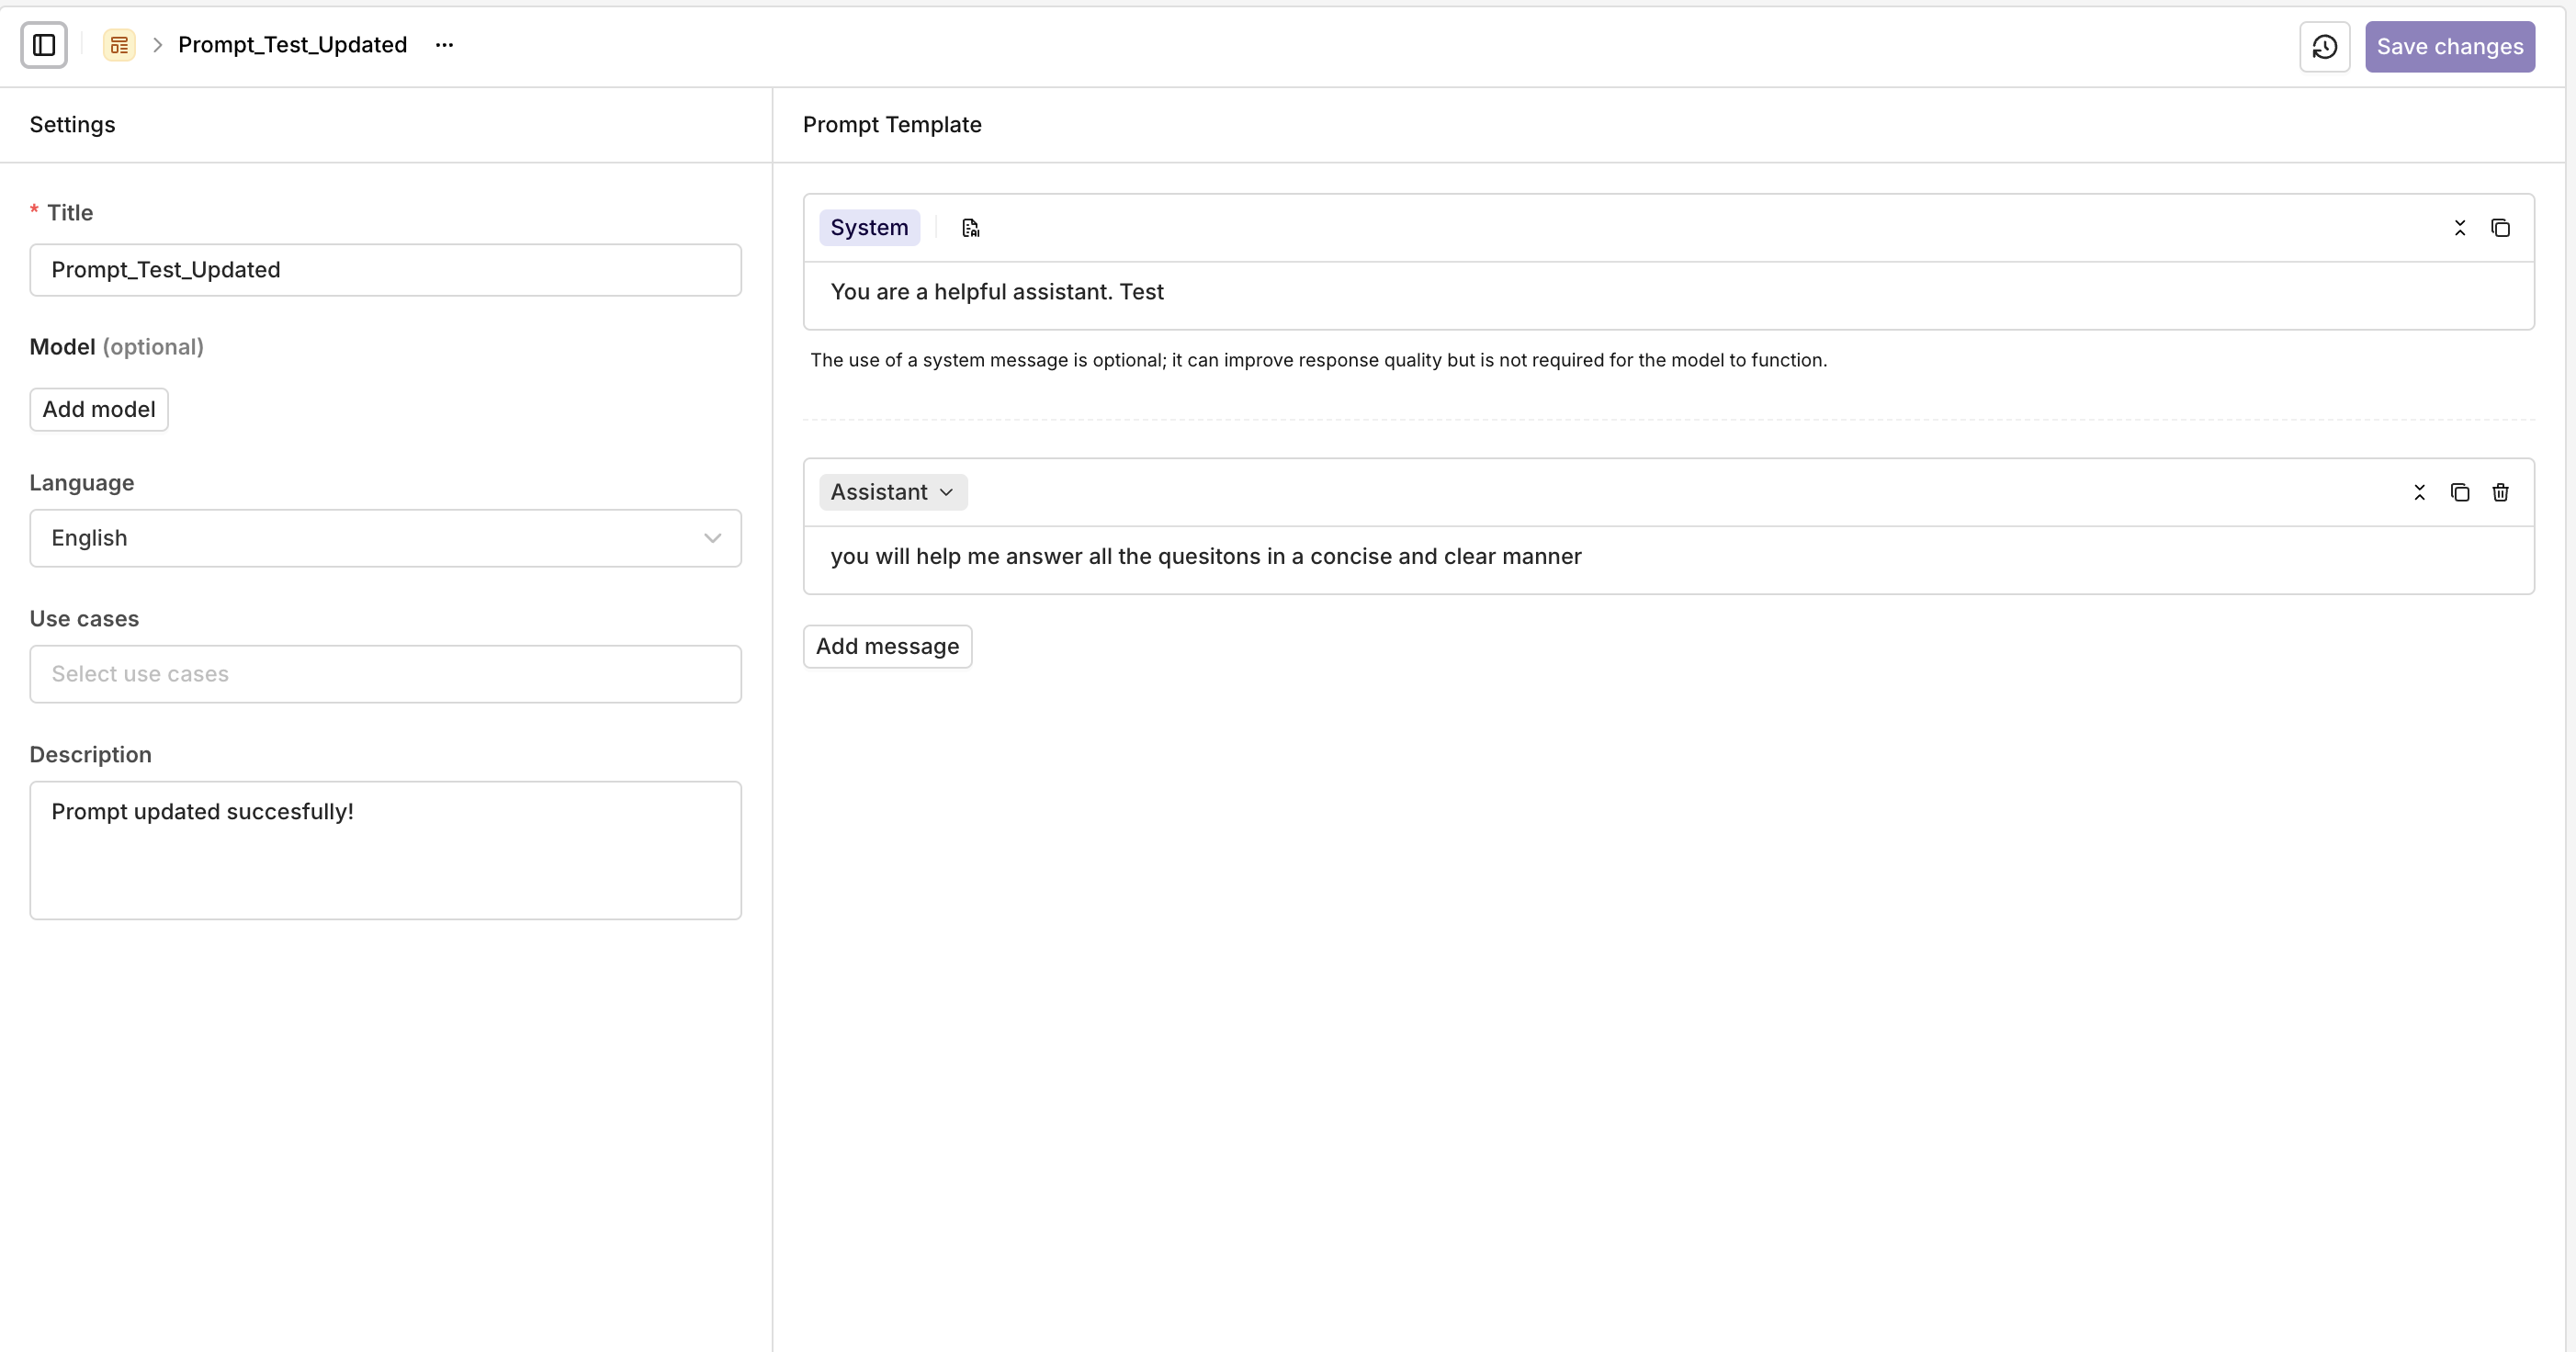

## Delete

Delete a specific prompt.

In [ ]:
print("Your prompts before deletion:")
for prompt in orq.prompts.list().data:
    print(prompt.display_name)

res = orq.prompts.delete(id=specific_prompt_id)

print("")
print("Your Prompts after deletion:")
for prompt in orq.prompts.list().data:
    print(prompt.display_name) 


## List versions

List all the versions of a specific prompt.

In [ ]:
# Without extra parameters
res = orq.prompts.list_versions(prompt_id=specific_prompt_id) 
print(res.data)

print("")
print("Your Prompt Versions:")
for version in res.data:
    print(f"Version id : {version.id}")
    for message in version.prompt_config.messages:
        print(f" - role: {message.role} - content: {message.content}")

## get version

Retrieve a specific verison of a prompt.

In [ ]:

specific_version_id = "" # change for the version id of your specific prompt

res = orq.prompts.get_version(prompt_id = specific_prompt_id, version_id = specific_version_id)
print(res)

print("")
print("Your Version Info:")
print(f"Version id : {res.id}")
for message in res.prompt_config.messages:
    print(f" - role: {message.role} - content: {message.content}")